In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# reproducibility
np.random.seed(7)

# 20 sample data points
coffee_cups = np.random.randint(0, 10, 20)              # cups of coffee per day (0–9)
productivity = 5 * coffee_cups + np.random.normal(0, 5, 20)  # roughly linear + noise

# Create DataFrame
df = pd.DataFrame({
    "Coffee_Cups": coffee_cups,
    "Productivity": productivity
})

print(df.head())


   Coffee_Cups  Productivity
0            4     19.925159
1            9     45.106953
2            6     33.743905
3            3     14.584321
4            3     15.353646


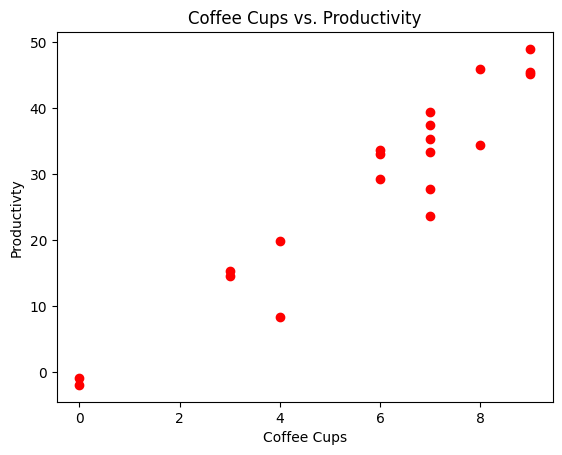

In [10]:
# Visualizing created data
plt.scatter(coffee_cups, productivity, color="red")
plt.xlabel("Coffee Cups")
plt.ylabel("Productivty")
plt.title("Coffee Cups vs. Productivity")
plt.show()

In [15]:
# Splitting the data into training and test groups
X_train, X_test, y_train, y_test = train_test_split(coffee_cups, productivity, test_size=0.2, random_state=7)
print("The split data is as follows:")
print("X's training set is:", X_train)
print("y's training set is:", y_train)
print("X's test set is:", X_test)
print("y's test set is:", y_test)

The split data is as follows:
X's training set is: [8 4 7 7 6 6 9 4 7 7 8 7 9 3 3 0]
y's training set is: [45.88331523 19.92515896 37.38507901 39.36946903 29.21590692 33.00006921
 48.97092262  8.35578454 35.35330311 23.74832636 34.46441314 27.82337021
 45.51786973 14.58432084 15.35364571 -0.8425633 ]
X's test set is: [9 0 6 7]
y's test set is: [45.10695337 -1.89602238 33.74390538 33.32899893]


In [35]:
# Firstly we calculate the slope as covariance(X, Y) / variance(X)
mean_X_train = np.mean(X_train)
mean_y_train = np.mean(y_train)

# Covariance
cov_numerator = 0
for i in range(len(X_train)):
    cov_numerator += ((X_train[i] - mean_X_train) * (y_train[i] - mean_y_train))

print("Numerator value for covariance calculating:", cov_numerator)

covariance = cov_numerator / len(X_train)
print("The covariance will be: ", covariance)

# Variance of X
sum_X = 0
for i in range(len(X_train)):
    sum_X += ((X_train[i] - mean_X_train) ** 2)

variance_X = (1 / len(X_train)) * sum_X
print("Variance of X is:", variance_X)

slope = covariance / variance_X
print("Slope value is:", slope)

Numerator value for covariance calculating: 495.15274911136714
The covariance will be:  30.947046819460446
Variance of X is: 5.80859375
Slope value is: 5.327803621911146


In [36]:
# Next we calculate the y-intercept as mean(y) - (slope * mean(x))
y_intercept = mean_y_train - slope * mean_X_train
print("Y-Intercept is:", y_intercept)
print(f"Our line of best fit should be of the form: y = {slope}m + {y_intercept}")

Y-Intercept is: -3.002059547655289
Our line of best fit should be of the form: y = 5.327803621911146m + -3.002059547655289


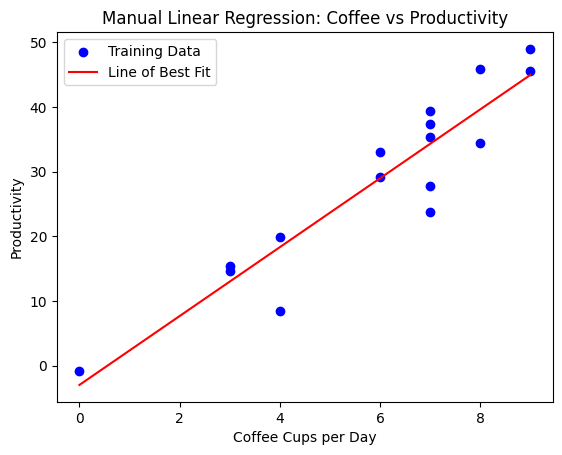

In [38]:
# Plotting this on the graph we see

plt.scatter(X_train, y_train, color="blue", label="Training Data")
x_line = np.linspace(X_train.min(), X_train.max(), 100)
y_line = slope * x_line + y_intercept

# Plotting regression line
plt.plot(x_line, y_line, color="red", label="Line of Best Fit")

# Graph to show
plt.xlabel("Coffee Cups per Day")
plt.ylabel("Productivity")
plt.title("Manual Linear Regression: Coffee vs Productivity")
plt.legend()
plt.show()
